In [21]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

In [22]:
num_qbits = 6

# Declaración registros
qr = QuantumRegister(num_qbits)
cr = ClassicalRegister(num_qbits)
if num_qbits > 3:
    aux = QuantumRegister(num_qbits-3)
    groverCircuit = QuantumCircuit(qr,cr, aux)
else:
    aux = QuantumRegister(1)
    groverCircuit = QuantumCircuit(qr,cr, aux)

In [23]:
# Hadamard inicial
groverCircuit.h(qr)
groverCircuit.barrier(qr)

In [24]:
# Definición del oraculo

groverCircuit.x(qr[1])
groverCircuit.h(qr[num_qbits-1])
groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
groverCircuit.h(qr[num_qbits-1])
groverCircuit.x(qr[1])

groverCircuit.x([qr[1],qr[3]])
groverCircuit.h(qr[num_qbits-1])
groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
groverCircuit.h(qr[num_qbits-1])
groverCircuit.x([qr[1],qr[3]])

groverCircuit.x([qr[0],qr[5]])
groverCircuit.h(qr[num_qbits-1])
groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
groverCircuit.h(qr[num_qbits-1])
groverCircuit.x([qr[0],qr[5]])

groverCircuit.x([qr[4],qr[5]])
groverCircuit.h(qr[num_qbits-1])
groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
groverCircuit.h(qr[num_qbits-1])
groverCircuit.x([qr[4],qr[5]])



In [25]:
# Inversión de la media


result = math.pi*math.sqrt((2**num_qbits))/4
print(result)
iterations = round(result)+1
print(iterations)

for i in range(iterations-1): # pi * ((2^n)^(1/2))/ 4
    groverCircuit.barrier(qr)
    groverCircuit.h(qr)
    groverCircuit.x(qr)
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.mct(qr[0:num_qbits-1], qr[num_qbits-1], aux)
    groverCircuit.h(qr[num_qbits-1])
    groverCircuit.x(qr)
    groverCircuit.h(qr)

groverCircuit.barrier(qr)



3.141592653589793
4


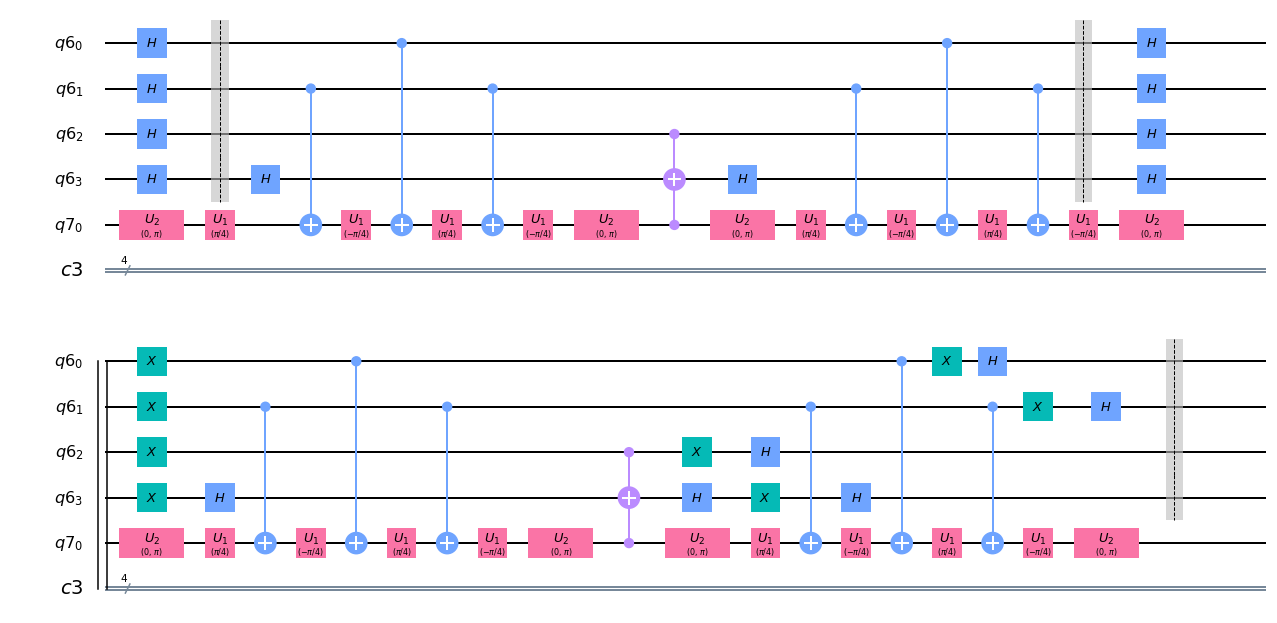

In [26]:
groverCircuit.draw(output="mpl")

In [27]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(groverCircuit, backend_sim)
statevec = job_sim.result().get_statevector()
print(statevec)

[-0.1875+0.j -0.1875+0.j -0.1875+0.j -0.1875+0.j -0.1875+0.j -0.1875+0.j
 -0.1875+0.j -0.1875+0.j -0.1875+0.j -0.1875+0.j -0.1875+0.j -0.1875+0.j
 -0.1875+0.j -0.1875+0.j -0.1875+0.j -0.6875+0.j  0.    +0.j  0.    +0.j
  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j
  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j  0.    +0.j
  0.    +0.j  0.    +0.j]


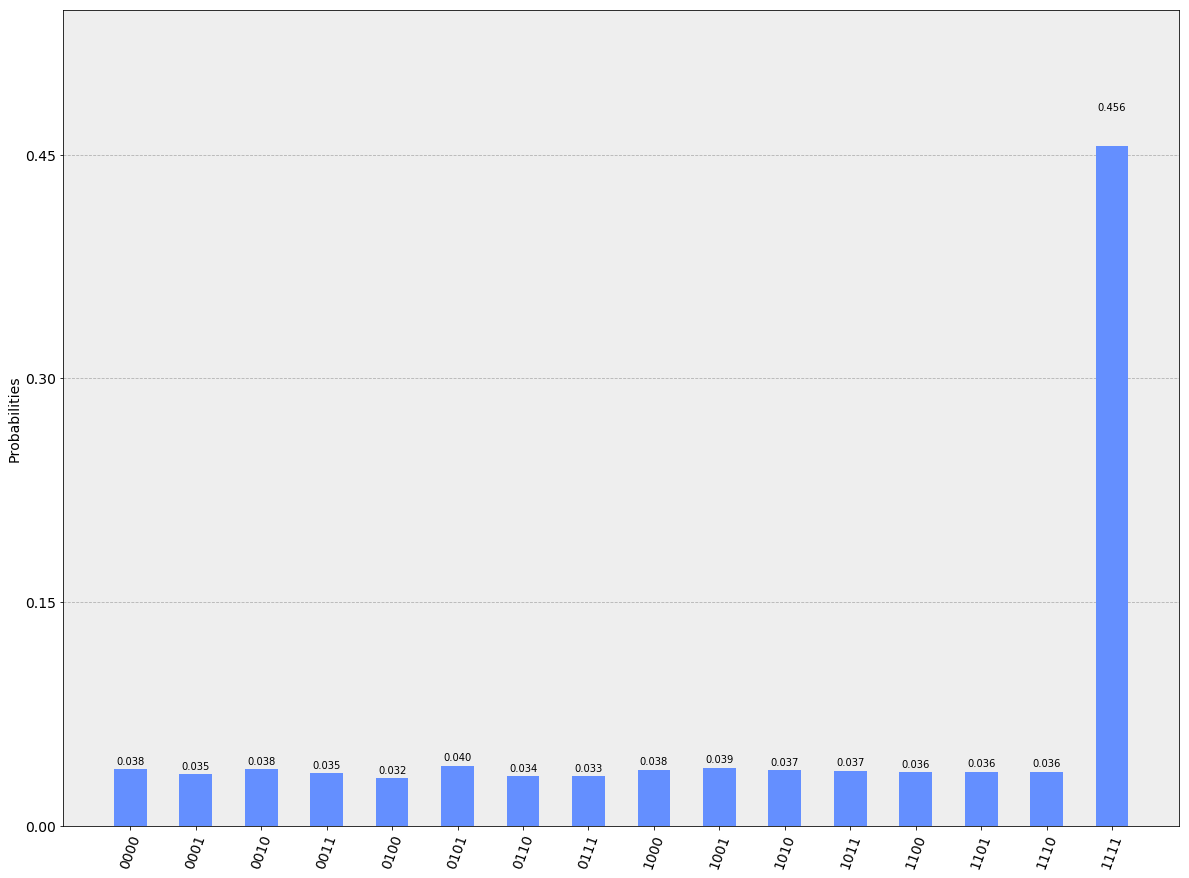

In [30]:
groverCircuit.measure(qr,cr)

backend = BasicAer.get_backend('qasm_simulator')
shots = 5000
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer, figsize=[20,15], bar_labels=True)

In [ ]:
# values = list(answer.values())

# maximum = max(values)
# del values[values.index(maximum)]
# mean = np.mean(values)
# divisions = [maximum/x for x in values]
# value = np.mean(divisions)
# # print(mean)
# # print(maximum)
# importance = maximum/mean
# print("Probability of selected is %.2f bigger"%value)

In [ ]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
# device = least_busy(provider.backends(simulator=False))
device = provider.get_backend('ibmq_qasm_simulator')
print("Running on current least busy device: ", device)

In [ ]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(groverCircuit, backend=device, shots=5000, max_credits=14)
job_monitor(job, interval = 2)

In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(groverCircuit)
plot_histogram(answer, figsize=[40,30], bar_labels=False)